# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


# Features

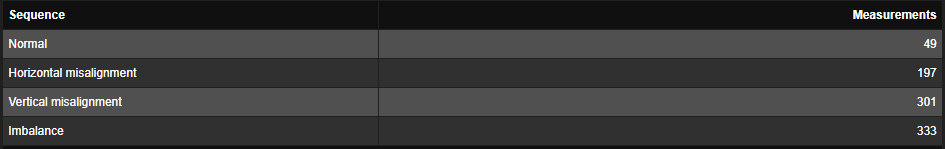
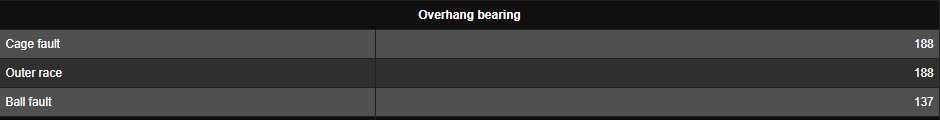
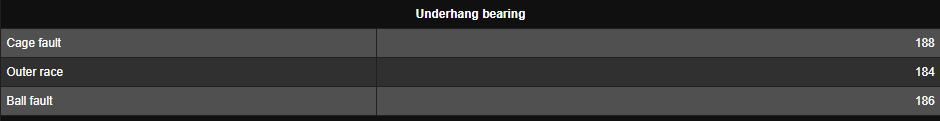


## Scenarios

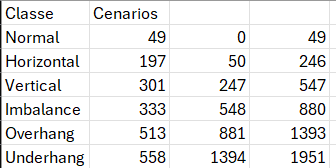

In [50]:
y = np.zeros(1951)
y.shape

(1951,)

In [49]:
y[1952]

IndexError: index 1952 is out of bounds for axis 0 with size 1951

In [65]:
# Normal
y[0:50] = 1

# Horizontal
y[50:247] = 2

# Vertical
y[247:547] = 3

# Imbalance
y[547:880] = 4

# Overhang
y[880:1393] = 5

# Underhang
y[1393:1951] = 6



In [66]:
# Read features dataset and check the first lines
X = pl.read_csv('dataset/FeaturesDataset.csv')
X.head()

Rf,Rf2,2Rf2,3Rf2,Rf3,2Rf3,3Rf3,Rf4,2Rf4,3Rf4,Rf5,2Rf5,3Rf5,Rf6,2Rf6,3Rf6,Rf7,2Rf7,3Rf7,Rf8,2Rf8,3Rf8,He1,Me1,Ku1,He2,Me2,Ku2,He3,Me3,Ku3,He4,Me4,Ku4,He5,Me5,Ku5,He6,Me6,Ku6,He7,Me7,Ku7,He8,Me8,Ku8
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
24.000192,0.000683,0.000906,0.001137,0.002617,0.001014,0.000445,0.0006,0.000284,0.000356,0.042056,0.005808,0.002233,0.00106,0.0001,0.000172,0.011005,0.002421,0.001005,0.00051,0.001167,0.000078,0.898274,0.381278,4.304769,2.018721,0.380603,-1.06574,1.639317,0.380849,-0.725947,1.64874,0.380965,-0.377444,1.878726,0.384693,-0.387145,1.988329,0.381308,-0.767456,1.750532,0.381528,-0.250984,1.724157,0.381897,0.065311
25.600205,0.002765,0.002409,0.002535,0.004333,0.000661,0.000534,0.000423,0.000272,0.000118,0.05205,0.009884,0.009922,0.001053,0.000139,0.000196,0.013258,0.001201,0.00153,0.000637,0.001072,0.000205,0.928501,0.467355,4.168934,1.962656,0.468465,-0.984737,1.64736,0.466705,-0.660431,1.625401,0.466797,-0.307739,1.919754,0.468241,-0.597151,1.960709,0.467065,-0.766667,1.935416,0.466715,-0.583971,1.661646,0.467566,0.241929
28.000224,0.000602,0.000638,0.000286,0.001239,0.000354,0.001019,0.000129,0.000102,0.000303,0.010226,0.000693,0.005143,0.000433,0.000094,0.000124,0.002414,0.000424,0.000907,0.000201,0.000396,0.000017,0.971581,0.466046,4.138461,1.997051,0.471326,-1.021556,1.682617,0.466381,-0.63432,1.602516,0.466484,-0.226448,1.854107,0.462647,-0.248633,1.939774,0.466688,-0.697357,1.676124,0.465161,-0.018516,1.685009,0.468266,0.063211
29.600237,0.002851,0.001257,0.001715,0.007531,0.002384,0.000071,0.00023,0.000456,0.00011,0.05844,0.007248,0.005113,0.001293,0.002089,0.000203,0.015402,0.002434,0.000283,0.000714,0.001834,0.000097,0.943421,0.469397,3.967974,1.981107,0.472053,-0.99857,1.632274,0.46907,-0.612934,1.659394,0.46918,-0.207611,1.921875,0.465597,-0.34026,1.918103,0.469403,-0.715218,1.713411,0.467762,0.086913,1.687376,0.471156,0.018236
31.600253,0.000253,0.001906,0.000774,0.005902,0.002845,0.000786,0.000117,0.000404,0.000176,0.060609,0.006867,0.002695,0.000802,0.000042,0.000153,0.017627,0.001733,0.000928,0.000655,0.001507,0.000029,0.864854,0.443574,3.814004,1.97154,0.442476,-1.000173,1.679369,0.44298,-0.527783,1.636327,0.44311,-0.159738,1.854548,0.43891,-0.203249,1.984204,0.443367,-0.864867,1.634181,0.436212,0.00973,1.762669,0.444594,-0.100906


In [67]:
# Check if there is any null values
X.select(pl.all().is_null().sum())

Rf,Rf2,2Rf2,3Rf2,Rf3,2Rf3,3Rf3,Rf4,2Rf4,3Rf4,Rf5,2Rf5,3Rf5,Rf6,2Rf6,3Rf6,Rf7,2Rf7,3Rf7,Rf8,2Rf8,3Rf8,He1,Me1,Ku1,He2,Me2,Ku2,He3,Me3,Ku3,He4,Me4,Ku4,He5,Me5,Ku5,He6,Me6,Ku6,He7,Me7,Ku7,He8,Me8,Ku8
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# Check if there is any NaN values in the dataframe
X.select(pl.all().is_nan().sum())

Rf,Rf2,2Rf2,3Rf2,Rf3,2Rf3,3Rf3,Rf4,2Rf4,3Rf4,Rf5,2Rf5,3Rf5,Rf6,2Rf6,3Rf6,Rf7,2Rf7,3Rf7,Rf8,2Rf8,3Rf8,He1,Me1,Ku1,He2,Me2,Ku2,He3,Me3,Ku3,He4,Me4,Ku4,He5,Me5,Ku5,He6,Me6,Ku6,He7,Me7,Ku7,He8,Me8,Ku8
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
# Create the dataset used to train the model

# Here, we will concat the features (X)  with the characteristics (y)
y_df = pl.DataFrame({"y": y})
dataset = pl.concat([X,y_df], how="horizontal")
dataset.head()

Rf,Rf2,2Rf2,3Rf2,Rf3,2Rf3,3Rf3,Rf4,2Rf4,3Rf4,Rf5,2Rf5,3Rf5,Rf6,2Rf6,3Rf6,Rf7,2Rf7,3Rf7,Rf8,2Rf8,3Rf8,He1,Me1,Ku1,He2,Me2,Ku2,He3,Me3,Ku3,He4,Me4,Ku4,He5,Me5,Ku5,He6,Me6,Ku6,He7,Me7,Ku7,He8,Me8,Ku8,y
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
24.000192,0.000683,0.000906,0.001137,0.002617,0.001014,0.000445,0.0006,0.000284,0.000356,0.042056,0.005808,0.002233,0.00106,0.0001,0.000172,0.011005,0.002421,0.001005,0.00051,0.001167,0.000078,0.898274,0.381278,4.304769,2.018721,0.380603,-1.06574,1.639317,0.380849,-0.725947,1.64874,0.380965,-0.377444,1.878726,0.384693,-0.387145,1.988329,0.381308,-0.767456,1.750532,0.381528,-0.250984,1.724157,0.381897,0.065311,1.0
25.600205,0.002765,0.002409,0.002535,0.004333,0.000661,0.000534,0.000423,0.000272,0.000118,0.05205,0.009884,0.009922,0.001053,0.000139,0.000196,0.013258,0.001201,0.00153,0.000637,0.001072,0.000205,0.928501,0.467355,4.168934,1.962656,0.468465,-0.984737,1.64736,0.466705,-0.660431,1.625401,0.466797,-0.307739,1.919754,0.468241,-0.597151,1.960709,0.467065,-0.766667,1.935416,0.466715,-0.583971,1.661646,0.467566,0.241929,1.0
28.000224,0.000602,0.000638,0.000286,0.001239,0.000354,0.001019,0.000129,0.000102,0.000303,0.010226,0.000693,0.005143,0.000433,0.000094,0.000124,0.002414,0.000424,0.000907,0.000201,0.000396,0.000017,0.971581,0.466046,4.138461,1.997051,0.471326,-1.021556,1.682617,0.466381,-0.63432,1.602516,0.466484,-0.226448,1.854107,0.462647,-0.248633,1.939774,0.466688,-0.697357,1.676124,0.465161,-0.018516,1.685009,0.468266,0.063211,1.0
29.600237,0.002851,0.001257,0.001715,0.007531,0.002384,0.000071,0.00023,0.000456,0.00011,0.05844,0.007248,0.005113,0.001293,0.002089,0.000203,0.015402,0.002434,0.000283,0.000714,0.001834,0.000097,0.943421,0.469397,3.967974,1.981107,0.472053,-0.99857,1.632274,0.46907,-0.612934,1.659394,0.46918,-0.207611,1.921875,0.465597,-0.34026,1.918103,0.469403,-0.715218,1.713411,0.467762,0.086913,1.687376,0.471156,0.018236,1.0
31.600253,0.000253,0.001906,0.000774,0.005902,0.002845,0.000786,0.000117,0.000404,0.000176,0.060609,0.006867,0.002695,0.000802,0.000042,0.000153,0.017627,0.001733,0.000928,0.000655,0.001507,0.000029,0.864854,0.443574,3.814004,1.97154,0.442476,-1.000173,1.679369,0.44298,-0.527783,1.636327,0.44311,-0.159738,1.854548,0.43891,-0.203249,1.984204,0.443367,-0.864867,1.634181,0.436212,0.00973,1.762669,0.444594,-0.100906,1.0


In [70]:
# Divide the training and test dataset
# random_state=42 just to help in the partition replication
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
  

In [71]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [82]:
model_labels = ["Normal", "Horizontal Misalignment", "Vertical Misalignment", "Imbalance", "Overhang", "Underhang"]

# Random Forest

It was verified for n_estimators > 5, the score will perform above 99% for random forest models applied to the dataset MaFaulDa.
For project decision purposes, the interval 10 < n_estimator < 20 has been chosen to be used. Using cross validation, we obtained n_estimator=19 as a reasonable value.



In [72]:
n_estimators = np.arange(10, 20, 1)

for val in n_estimators:
    score = cross_val_score(RandomForestClassifier(n_estimators= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.2f}".format(score.mean()*100)}%')

Average score(10): 89.75%
Average score(11): 90.00%
Average score(12): 90.41%
Average score(13): 91.03%
Average score(14): 90.98%
Average score(15): 91.54%
Average score(16): 91.95%
Average score(17): 92.05%
Average score(18): 92.36%
Average score(19): 91.80%


In [77]:
# Training and testing Random Forest Model

# Create the model
modelRandomForest = RandomForestClassifier(n_estimators= 18, random_state= 42)

# Fit the model
modelRandomForest.fit(X_train, y_train)

# Get the model predictions 
y_pred = modelRandomForest.predict(X_test)


# Test the model and calculate the performance values

# Accuracy
acc_test = accuracy_score(y_test,y_pred)

# Precision
prec_test = precision_score(y_test,y_pred, average='weighted')

# Recall
rec_test = recall_score(y_test,y_pred, average='weighted')

# F1 Score
f1_test = f1_score(y_test,y_pred, average='weighted')


# Results
print(f'Test Accuracy: {"{:.2f}".format(acc_test*100)}%')
print(f'Test Precision: {"{:.2f}".format(prec_test*100)}%')
print(f'Test Recall: {"{:.2f}".format(rec_test*100)}%')
print(f'F1-score: {"{:.2f}".format(f1_test*100)}%')

Test Accuracy: 92.32%
Test Precision: 92.37%
Test Recall: 92.32%
F1-score: 92.11%


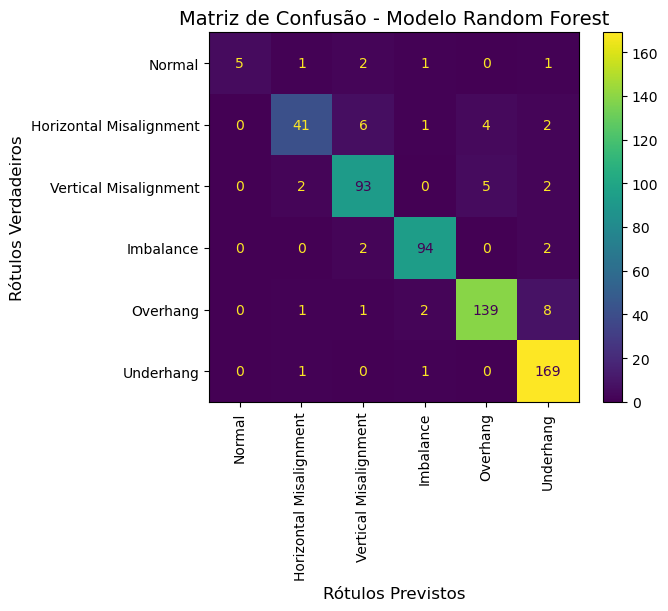

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion_Matrix = confusion_matrix(y_test,y_pred)
# Confusion_Matrix_Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix[1:7,1:7],
#                               display_labels=["Normal", "Horizontal", "Vertical", "Imbalance", "Overhang", "Underhang"],
#                               xticks_rotation="vertical")
ConfusionMatrixDisplay.from_estimator(modelRandomForest, 
                                      X_test, 
                                      y_test, 
                                      display_labels= model_labels, 
                                      xticks_rotation="vertical")

# Plota a matriz de confusão com rótulos customizados
plt.plot()
plt.xlabel('Rótulos Previstos', fontsize=12)  # Em português
plt.ylabel('Rótulos Verdadeiros', fontsize=12)  # Em português
plt.title('Matriz de Confusão - Modelo Random Forest', fontsize=14)  # Título em português
plt.show()

# Plot the confusion matrix with custom labels in english
# plt.plot()
# plt.xlabel('Predicted Labels', fontsize=12)  # In English
# plt.ylabel('True Labels', fontsize=12)  # In English
# plt.title('Confusion Matrix - Random Forest', fontsize=14)  # Title in English
# plt.show()

# SVM

After testing some values, it was decided to use C = 220.

In [84]:
C = np.arange(200,410,10)

for c in C:
    #print(c)
    score = cross_val_score(SVC(kernel='rbf', C=c, gamma='auto', class_weight='balanced'), X, y, cv= kf, scoring="accuracy")
#score = cross_val_score(SVC(kernel='linear', C=150, gamma='auto'), X, y, cv= kf, scoring="accuracy")
    print(f'C = {c}, Score: {"{:.2f}".format(score.mean()*100)}%')


C = 200, Score: 90.06%
C = 210, Score: 90.00%
C = 220, Score: 90.00%
C = 230, Score: 90.00%
C = 240, Score: 89.90%
C = 250, Score: 89.95%
C = 260, Score: 89.90%
C = 270, Score: 89.95%
C = 280, Score: 89.90%
C = 290, Score: 89.75%
C = 300, Score: 89.65%
C = 310, Score: 89.59%
C = 320, Score: 89.59%
C = 330, Score: 89.70%
C = 340, Score: 89.65%
C = 350, Score: 89.65%
C = 360, Score: 89.70%
C = 370, Score: 89.80%
C = 380, Score: 89.85%
C = 390, Score: 89.85%
C = 400, Score: 89.85%


In [87]:
modelSVM = SVC(kernel='rbf', C=200, gamma='auto', class_weight='balanced')
modelSVM.fit(X_train, y_train)
y_pred_SVM = modelSVM.predict(X_test)

#acc_test_SVM = accuracy_score(y_test,y_pred_SVM)

#print(f'Test Accuracy: {"{:.2f}".format(acc_test_SVM*100)}%')

acc_test_SVM = accuracy_score(y_test,y_pred_SVM)
prec_test_SVM = precision_score(y_test,y_pred_SVM, average='weighted')
rec_test_SVM = recall_score(y_test,y_pred_SVM, average='weighted')
f1_test_SVM = f1_score(y_test,y_pred_SVM, average='weighted')

print(f'Test Accuracy: {"{:.2f}".format(acc_test_SVM*100)}%')
print(f'Test Precision: {"{:.2f}".format(prec_test_SVM*100)}%')
print(f'Test Recall: {"{:.2f}".format(rec_test_SVM*100)}%')
print(f'F1-score: {"{:.2f}".format(f1_test_SVM*100)}%')

Test Accuracy: 88.74%
Test Precision: 88.93%
Test Recall: 88.74%
F1-score: 88.52%


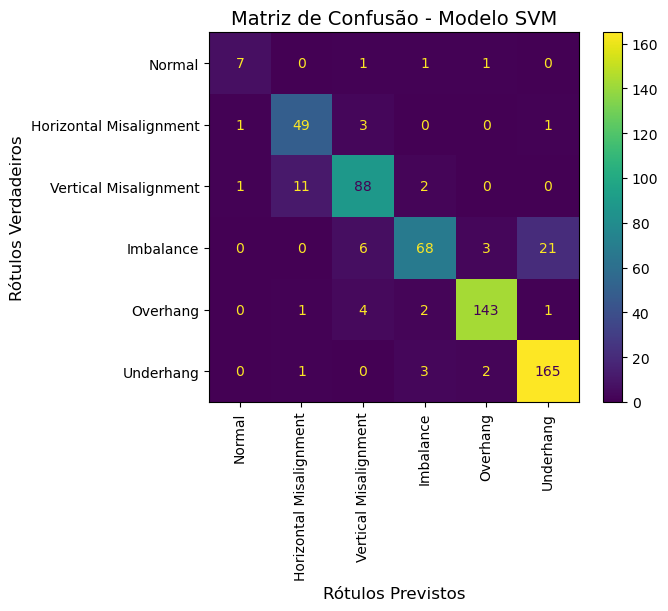

In [95]:
ConfusionMatrixDisplay.from_estimator(modelSVM, 
                                      X_test, 
                                      y_test, 
                                      display_labels= model_labels, 
                                      xticks_rotation="vertical")

# Plota a matriz de confusão com rótulos customizados
plt.plot()
plt.xlabel('Rótulos Previstos', fontsize=12)  # Em português
plt.ylabel('Rótulos Verdadeiros', fontsize=12)  # Em português
plt.title('Matriz de Confusão - Modelo SVM', fontsize=14)  # Título em português
plt.show()

# Plot the confusion matrix with custom labels in english
# plt.plot()
# plt.xlabel('Predicted Labels', fontsize=12)  # In English
# plt.ylabel('True Labels', fontsize=12)  # In English
# plt.title('Confusion Matrix - SVM', fontsize=14)  # Title in English
# plt.show()

# Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
score = cross_val_score(GradientBoostingClassifier(), X, y, cv= kf, scoring="accuracy")
print(f'C = {c}, Score: {"{:.2f}".format(score.mean()*100)}%')

C = 400, Score: 95.39%


In [91]:
modelGBC = GradientBoostingClassifier()
modelGBC.fit(X_train, y_train)
y_pred_GBC = modelGBC.predict(X_test)

acc_test_GBC = accuracy_score(y_test,y_pred_GBC)
prec_test_GBC = precision_score(y_test,y_pred_GBC, average='weighted')
rec_test_GBC = recall_score(y_test,y_pred_GBC, average='weighted')
f1_test_GBC = f1_score(y_test,y_pred_GBC, average='weighted')

print(f'Test Accuracy: {"{:.2f}".format(acc_test_GBC*100)}%')
print(f'Test Precision: {"{:.2f}".format(prec_test_GBC*100)}%')
print(f'Test Recall: {"{:.2f}".format(rec_test_GBC*100)}%')
print(f'F1-score: {"{:.2f}".format(f1_test_GBC*100)}%')

Test Accuracy: 95.05%
Test Precision: 95.10%
Test Recall: 95.05%
F1-score: 94.92%


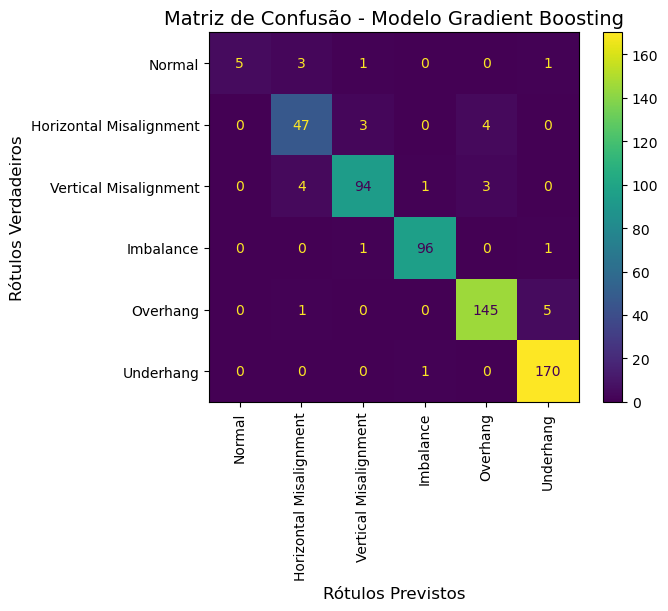

In [94]:
ConfusionMatrixDisplay.from_estimator(modelGBC, 
                                      X_test, 
                                      y_test, 
                                      display_labels= model_labels, 
                                      xticks_rotation="vertical")

# Plota a matriz de confusão com rótulos customizados em português
plt.plot()
plt.xlabel('Rótulos Previstos', fontsize=12)  # Em português
plt.ylabel('Rótulos Verdadeiros', fontsize=12)  # Em português
plt.title('Matriz de Confusão - Modelo Gradient Boosting', fontsize=14)  # Título em português
plt.show()

# Plot the confusion matrix with custom labels in english
# plt.plot()
# plt.xlabel('Predicted Labels', fontsize=12)  # In English
# plt.ylabel('True Labels', fontsize=12)  # In English
# plt.title('Confusion Matrix - Gradient Boosting', fontsize=14)  # Title in English
# plt.show()